In [13]:
import pandas as pd
import plotly.graph_objects as go

2 fuentes:
- Plazos fijos: https://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/pas2023.xls
- CER: https://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/cer2023.xls

In [14]:
def read_pf_trad_bcos(anio:int = 2024):
    df = pd.read_excel(f"https://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/pas{anio}.xls", sheet_name="Estra_dia_bancos", header=25)
    df = df.dropna(subset="fecha")
    df["fecha"] = df["fecha"].astype(int)
    df = df.set_index("fecha")
    df = df[["pasdes18","pasdes20","pasdes22","pasdes24"]] / 1_000 #Está en miles, lo paso a millones de pesos
    df = df.rename({"pasdes18":"pf_trad_99.000", "pasdes20":"pf_trad_100.000 a 499.999",
                                    "pasdes22":"pf_trad_500.000 a 999.999", "pasdes24":"pf_trad_1.000.000+"},axis=1)
    return df

pf_trad_df = []
for anio in [2020,2021,2022,2023,2024]:
    temp = read_pf_trad_bcos(anio=anio)
    pf_trad_df.append(temp)
pf_trad_df = pd.concat(pf_trad_df)
pf_trad_df

,pf_trad_99.000,pf_trad_100.000 a 499.999,pf_trad_500.000 a 999.999,pf_trad_1.000.000+
fecha,,,,
20200102,3271.352,15352.223,10462.915,76408.098
20200103,3397.743,16271.182,11528.363,51287.046
20200106,2816.056,13176.455,9026.834,48506.163
20200107,1613.064,7278.187,4715.954,24213.779
20200108,2854.890,14360.960,10075.839,58416.095
...,...,...,...,...
20240111,1092.035,14213.680,21411.519,362783.459
20231227,1765.107,22473.963,37629.808,928631.816
20231228,1007.601,12609.965,19226.983,647953.854


In [15]:
def read_pf_uva(anio:int = 2024):
    df = pd.read_excel(f"https://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/pas{anio}.xls", sheet_name="UVA_UVI", header=25, index_col="fecha")
    df = df[["pasvar01","pasvar04","pasvar07","pasvar10"]] / 1_000 #Está en miles, lo paso a millones de pesos
    df = df.rename({"pasvar01":"pf_uva_99.000", "pasvar04":"pf_uva_100.000 a 499.999",
                                    "pasvar07":"pf_uva_500.000 a 999.999", "pasvar10":"pf_uva_1.000.000+"},axis=1)
    return df

pf_uva_df = []
for anio in [2020,2021,2022,2023,2024]:
    temp = read_pf_uva(anio=anio)
    pf_uva_df.append(temp)
pf_uva_df = pd.concat(pf_uva_df)
pf_uva_df

,pf_uva_99.000,pf_uva_100.000 a 499.999,pf_uva_500.000 a 999.999,pf_uva_1.000.000+
fecha,,,,
20200102,21.202,51.253,35.153,786.613
20200103,15.057,39.073,21.533,187.447
20200106,19.082,47.981,25.533,2007.373
20200107,14.209,31.178,17.425,191.170
20200108,15.062,40.351,23.439,404.594
...,...,...,...,...
20240105,11.068,167.707,244.561,1829.812
20240108,16.494,202.936,275.519,2664.425
20240109,9.751,97.535,148.688,2523.091


In [16]:
def read_cer(anio:int = 2024):
    df = pd.read_excel(f"https://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/cer{anio}.xls", header=25, index_col="fecha")
    df = df[["coef001"]]
    df = df.rename({"coef001":"cer"},axis=1)
    return df

cer_df = []
for anio in [2020,2021,2022,2023,2024]:
    temp = read_cer(anio=anio)
    cer_df.append(temp)
cer_df = pd.concat(cer_df)
cer_df = cer_df.drop_duplicates()
cer_df

,cer
fecha,
20200101,18.726329
20200102,18.751778
20200103,18.777262
20200104,18.802781
20200105,18.828335
...,...
20240211,238.913713
20240212,240.670652
20240213,242.440511


In [17]:
df = pf_trad_df.merge(right=pf_uva_df, left_index=True, right_index=True, how="left")
df = df.merge(right=cer_df, left_index=True, right_index=True, how="left")
df.index = pd.to_datetime(df.index, format="%Y%m%d")
df['pf_uva_total'] = df.filter(like='uva').sum(axis=1)
df['pf_trad_total'] = df.filter(like='trad').sum(axis=1)
df

,pf_trad_99.000,pf_trad_100.000 a 499.999,pf_trad_500.000 a 999.999,pf_trad_1.000.000+,pf_uva_99.000,pf_uva_100.000 a 499.999,pf_uva_500.000 a 999.999,pf_uva_1.000.000+,cer,pf_uva_total,pf_trad_total
fecha,,,,,,,,,,,
2020-01-02,3271.352,15352.223,10462.915,76408.098,21.202,51.253,35.153,786.613,18.751778,894.221,105494.588
2020-01-03,3397.743,16271.182,11528.363,51287.046,15.057,39.073,21.533,187.447,18.777262,263.110,82484.334
2020-01-06,2816.056,13176.455,9026.834,48506.163,19.082,47.981,25.533,2007.373,18.853923,2099.969,73525.508
2020-01-07,1613.064,7278.187,4715.954,24213.779,14.209,31.178,17.425,191.170,18.879546,253.982,37820.984
2020-01-08,2854.890,14360.960,10075.839,58416.095,15.062,40.351,23.439,404.594,18.905203,483.446,85707.784
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05,1035.271,14101.955,19298.279,297027.826,11.068,167.707,244.561,1829.812,188.560913,2253.148,331463.331
2024-01-08,1964.650,24895.121,35993.134,513300.197,16.494,202.936,275.519,2664.425,190.771653,3159.374,576153.102
2024-01-09,719.818,8912.128,12597.359,214177.855,9.751,97.535,148.688,2523.091,191.514311,2779.065,236407.160


In [18]:
df_ajustado = df.copy()
last_cer = df.cer.iloc[-1]
df_ajustado = df_ajustado.div(df["cer"],axis=0).mul(last_cer).drop("cer",axis=1)
df_ajustado.head()

,pf_trad_99.000,pf_trad_100.000 a 499.999,pf_trad_500.000 a 999.999,pf_trad_1.000.000+,pf_uva_99.000,pf_uva_100.000 a 499.999,pf_uva_500.000 a 999.999,pf_uva_1.000.000+,pf_uva_total,pf_trad_total
fecha,,,,,,,,,,
2020-01-02,33671.373691,158017.369461,107692.697350,786453.313729,218.227957,527.536907,361.822818,8096.450725,9204.038408,1.085835e+06
2020-01-03,34924.827330,167248.735940,118498.099229,527170.897210,154.768364,401.624778,221.334076,1926.736103,2704.463321,8.478426e+05
2020-01-06,28828.070729,134887.863273,92408.037699,496559.407111,195.343149,491.183294,261.382277,20549.552574,21497.461294,7.526834e+05
2020-01-07,16490.585455,74405.953318,48211.876553,247540.948032,145.260652,318.737182,178.138283,1954.358427,2596.494544,3.866494e+05
2020-01-08,29146.340792,146614.907848,102866.953635,596385.644503,153.772014,411.954225,239.295063,4130.609098,4935.630399,8.750138e+05


<Axes: xlabel='fecha'>

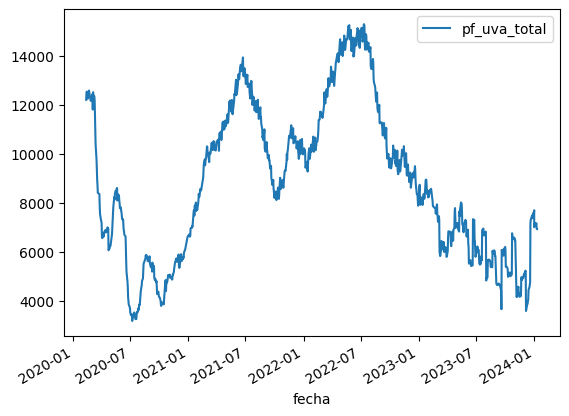

In [19]:
df_ajustado.rolling(window=30).mean()[["pf_uva_total"]].plot()

In [20]:
df_ajustado_mensual = df_ajustado.copy()
df_ajustado_mensual = df_ajustado_mensual.resample('M').sum()
df_ajustado_mensual.index = df_ajustado_mensual.index.month_name(locale='es_ES.utf8').str.lower().str[:3] + "-" + df_ajustado_mensual.index.year.astype(str).str[2:]
df_ajustado_mensual.head()

,pf_trad_99.000,pf_trad_100.000 a 499.999,pf_trad_500.000 a 999.999,pf_trad_1.000.000+,pf_uva_99.000,pf_uva_100.000 a 499.999,pf_uva_500.000 a 999.999,pf_uva_1.000.000+,pf_uva_total,pf_trad_total
fecha,,,,,,,,,,
ene-20,454159.514336,2.211338e+06,1.546383e+06,8.336882e+06,4730.496649,13904.233012,7958.045803,240709.088692,267301.864157,1.254876e+07
feb-20,374114.999761,1.944359e+06,1.381891e+06,7.994519e+06,6424.719351,22684.760635,14398.426907,138591.974938,182099.881831,1.169489e+07
mar-20,340325.938384,1.780620e+06,1.281803e+06,7.510976e+06,4188.575994,12748.440060,7654.762486,100517.164960,125108.943499,1.091373e+07
abr-20,345589.503927,1.892510e+06,1.470680e+06,8.453128e+06,5595.639594,18908.095744,12477.792741,110108.853094,147090.381174,1.216191e+07
may-20,333184.123044,1.783376e+06,1.362715e+06,8.867598e+06,6059.048570,22389.814919,14478.074767,109574.184266,152501.122522,1.234687e+07


In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df_ajustado_mensual.index, y = df_ajustado_mensual["pf_trad_total"]/df_ajustado_mensual["pf_trad_total"].iloc[0] * 100, name = "PF tradicional"))
fig.add_trace(go.Scatter(x = df_ajustado_mensual.index, y = df_ajustado_mensual["pf_uva_total"]/df_ajustado_mensual["pf_uva_total"].iloc[0] * 100, name = "PF UVA"))

fig.update_layout(template = None, separators = ",.", font_family = "georgia",
                  title_text = "Evolución comparada plazos fijos tradicionales vs UVA<br><sup> Ajustados por CER",
                  height = 600, width = 700, legend_orientation = "h", legend_y = 1.08)
fig.update_yaxes(tickformat = ",")
fig.update_xaxes(nticks = 15)
fig.add_vline(x = "jul-22", line_dash = "dash", line_width=.8)
fig.add_annotation(text="Renuncia Guzmán", x="jul-22",showarrow=False, y =170)
fig.add_vline(x="ago-23", line_dash = "dash", line_width = .8)
fig.add_annotation(text="Hiperlicuación", x="nov-23",showarrow=False, y =175)
fig.add_hline(y=100, line_dash = "dash",line_width = .8, annotation_text = "Base Enero 2020 = 100", annotation_position = "top left")
fig.add_annotation(text="Fuente BCRA", showarrow=False, xref="paper",yref="paper", x=0,y=-.09)

In [22]:
fig = go.Figure()
# fig.add_trace(go.Bar(x = df_ajustado_mensual.index, y = df_ajustado_mensual["pf_uva_total"]))
fig.add_trace(go.Bar(x = df_ajustado_mensual.index, y = df_ajustado_mensual["pf_trad_total"]))
ultimo_dato = df_ajustado_mensual["pf_trad_total"].iloc[-1]
ultimo_mes = df_ajustado_mensual.index[-1]
fig.update_layout(template = None, separators = ",.", font_family = "georgia",
                  title_text = f"Plazos fijos tradicional en millones de pesos ajustados por CER<br><sup>Último dato a {ultimo_mes}",
                  height = 600, width = 700, )
fig.update_yaxes(tickformat = ",")
fig.update_xaxes(nticks = 15)
fig.add_vline(x="ago-23", line_dash = "dash", line_width=.7)
fig.add_annotation(text = f"<b>{format(int(ultimo_dato), ',').replace(',', '.')}", x = ultimo_mes, y = ultimo_dato,ax=25,ay=-25)
fig.add_annotation(text="Fuente BCRA", showarrow=False, xref="paper",yref="paper", x=0,y=-.09)

In [23]:
fig = go.Figure()
fig.add_trace(go.Bar(x = df_ajustado_mensual.index, y = df_ajustado_mensual["pf_uva_total"]))
# fig.add_trace(go.Bar(x = df_ajustado_mensual.index, y = df_ajustado_mensual["pf_trad_total"]))
ultimo_dato = df_ajustado_mensual["pf_uva_total"].iloc[-1]
ultimo_mes = df_ajustado_mensual.index[-1]
fig.update_layout(template = None, separators = ",.", font_family = "georgia",
                  title_text = f"Plazos fijos UVA en millones de pesos ajustados por CER<br><sup>Último dato a {ultimo_mes}",
                  height = 600, width = 700, )
fig.update_yaxes(tickformat = ",")
fig.update_xaxes(nticks = 15)
fig.add_vline(x="ago-23", line_dash = "dash", line_width=.7)
fig.add_annotation(text = format(int(ultimo_dato), ',').replace(',', '.'), x = ultimo_mes, y = ultimo_dato,ax=0,ay=-25)
fig.add_annotation(text="Fuente BCRA", showarrow=False, xref="paper",yref="paper", x=0,y=-.09)

In [24]:
fig = go.Figure()

fig.add_trace(go.Bar(x = df_ajustado_mensual.index, y = df_ajustado_mensual["pf_trad_total"], yaxis='y1',offsetgroup=1, name="PF tradicional (izq)"))
fig.add_trace(go.Bar(x = df_ajustado_mensual.index, y = df_ajustado_mensual["pf_uva_total"], yaxis='y2',offsetgroup=2, name = "PF UVA (der)"))
ultimo_dato = df_ajustado_mensual["pf_uva_total"].iloc[-1]
ultimo_mes = df_ajustado_mensual.index[-1]
fig.update_layout(
  template = None, legend_orientation = "h", legend_y=1.05, separators = ",.",
  height = 600, width = 1_000, font_family="georgia",
  title_text = f"Evolución Plazos fijos (UVA vs tradicional) ajustado por CER a precios de hoy<br><sup>En millones de pesos. Último dato a {ultimo_mes}",
  yaxis2=dict(
      overlaying='y',
      side='right',
      tickformat = ","
  )
)
fig.update_yaxes(tickformat = ",")
fig.update_xaxes(nticks = 15)
fig.add_vline(x = "jul-22", line_dash = "dash", line_width=.8)
fig.add_annotation(text="<b>Renuncia Guzmán", x="jul-22",showarrow=False, y = 21_000_000)
fig.add_vline(x="nov-23", line_dash = "dash", line_width = .8)
fig.add_annotation(text="<b>Hiperlicuación", x="nov-23",showarrow=False, y =21_000_000)
fig.add_annotation(text = "Fuente BCRA", xref="paper",yref="paper", x=0, y=-.1, showarrow=False)